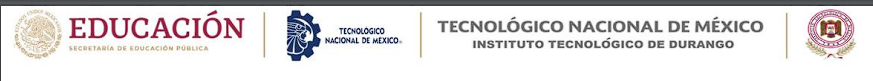
## Asignatura: Ciencia de los datos en las organizaciones 
## Unidad 2
#### Nombre del alumno: Leonardo Xavier Jacquez Ortiz
#### Practica 2: Análisis exploratorio de datos


In [2]:

##IMPORTAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
##CARGAMOS LOS DATOS
df= pd.read_csv("autos.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [21]:
df.replace("?", np.nan, inplace=True)

In [23]:
promedio_normalized_losses = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, promedio_normalized_losses, inplace=True)
##REMPLAZO DE NAN EN BORE
avg_bore = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)
## REMPLAZO DE NAN EN STROKE
avg_stroke = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, avg_bore, inplace= True)
##REMPLAZO DE NAN EN HORSEPOWER
avg_horsepower= df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace= True)
##REMPLAZO DE NAN EN PEAK-RPM

avg_peak_rpm= df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)
##REMPLAZAMOS POR EL NUMERO MAYOR DE PUERTAS
df["num-of-doors"].replace(np.nan, "four", inplace = True)
##Faltante es el del Precio
avg_price= df["price"].astype("float").mean(axis=0)
df["price"].replace(np.nan, avg_price, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [24]:
##LISTA DE TIPOS DE DATOS 
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [25]:
df.corr(numeric_only = True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [26]:
df[['horsepower','engine-size','peak-rpm','wheel-base','highway-mpg','city-mpg','price']].corr(numeric_only = True)

,engine-size,wheel-base,highway-mpg,city-mpg
engine-size,1.000000,0.569329,-0.677470,-0.653658
wheel-base,0.569329,1.000000,-0.544082,-0.470414
highway-mpg,-0.677470,-0.544082,1.000000,0.971337
city-mpg,-0.653658,-0.470414,0.971337,1.000000


(0.0, 52484.208457700755)

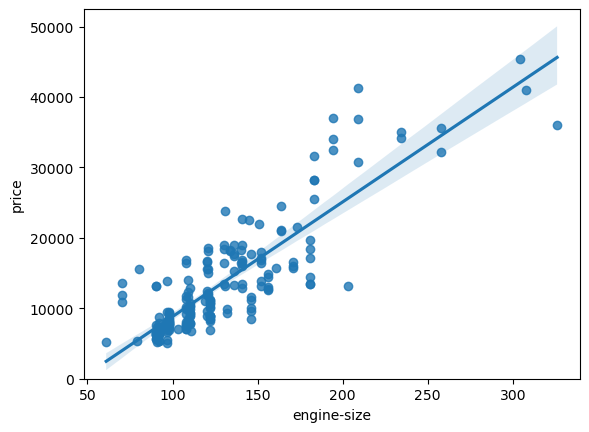

In [29]:
##VERIFICAMOS CON UN DIAGRAMA DE DISPERSION 
df[["price"]]= df[["price"]].astype("float")
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)


In [33]:
##EXAMINAMOS LA CORRELACION ENTRE TAMAÑO DEL MOTOR Y PRECIO
df[["engine-size",'price']].corr(numeric_only = True)

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

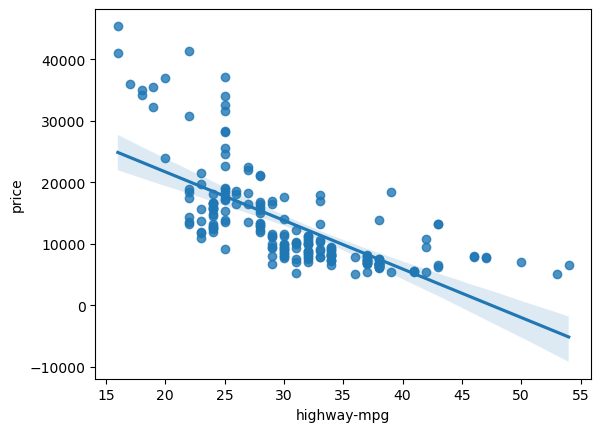

In [31]:
##MOSTRAMOS LA PREDICCION DE HIGHWAY CON PRECIO
sns.regplot(x="highway-mpg", y="price", data=df)

In [34]:
##EXAMINAMOS LA CORRELACION ENTRE HIGWAY-MPG Y PRECIO
df[['highway-mpg','price']].corr(numeric_only = True)

,highway-mpg,price
highway-mpg,1.000000,-0.690526
price,-0.690526,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

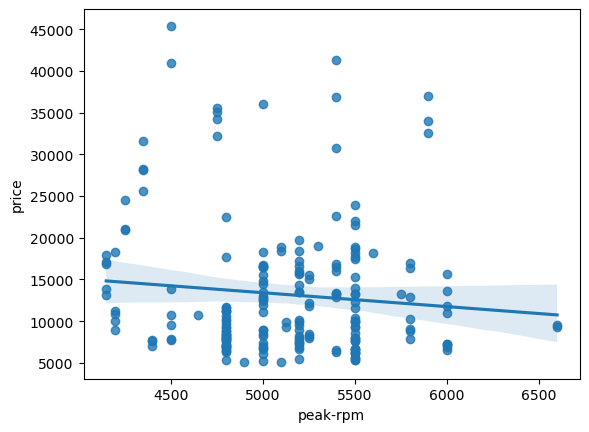

In [37]:
##MOSTRAMOS AQUI SI PEAK-RPM PUEDE PREDECIR LO DEL PRECIO
df[["peak-rpm"]]= df[["peak-rpm"]].astype("float")
sns.regplot(x="peak-rpm", y="price", data=df)

In [38]:
##EXAMINAMOS LA CORRELACION ENTRE PEAK-RPM Y PRECIO
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.100854
price,-0.100854,1.000000


<Axes: xlabel='body-style', ylabel='price'>

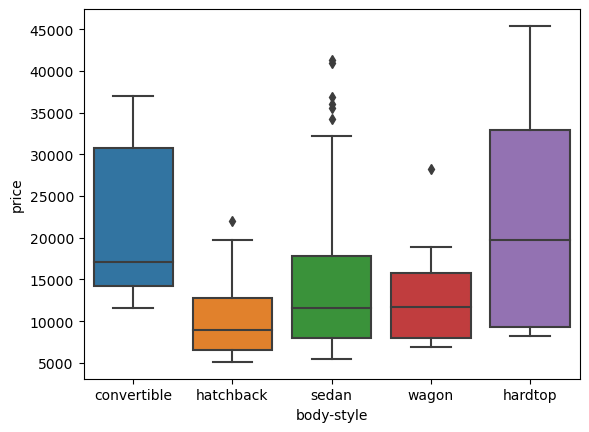

In [39]:
##REPRESENTAMOS LO QUE SON LAS VARIABLES CATEGORICAS CON EL SIGUIENTE DIAGRAMA DE CAJA
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

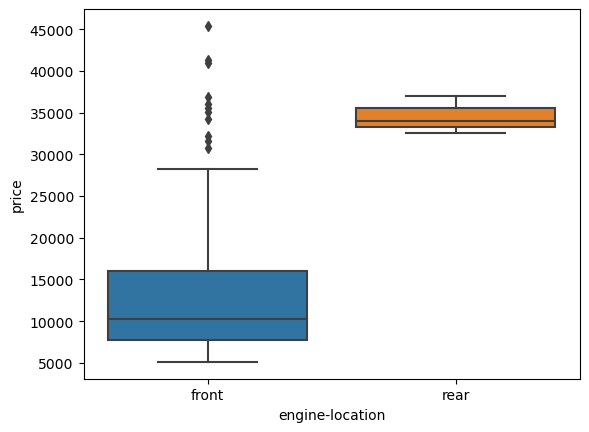

In [40]:
##EXAMINAMOS LA UBICACION DEL MOTOR CON EL PRECIO
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

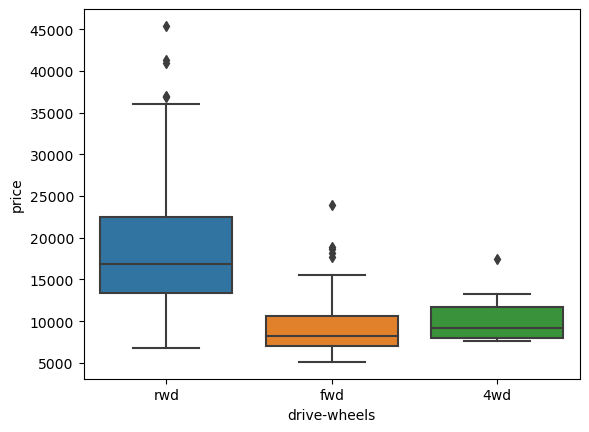

In [41]:
##AHORA CON DRIVE-WHEELS
sns.boxplot(x="drive-wheels", y="price", data=df)

In [42]:
##ANALISIS ESTADISTICO DESCRIPTIVO
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,6600.000000,49.000000,54.000000,45400.000000


In [43]:
##INCLUIMOS LAS VARIABLES DE TIPO OBJECT
df.describe(include=['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower
count,205.0,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52.0,22,2,2,2,5,3,2,7,7,8,39,37,60
top,122.0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68
freq,41.0,32,185,168,116,96,120,202,148,159,94,23,20,19


In [44]:
##CONTAMOS LOS VALORES
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [46]:
##AQUI CONVERTIMOS UNA SERIE DE DATAFRAME
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [47]:
##HACEMOS LO MISMO PERO AHORA GUARDANDOLO EN UN DATAFRAME DRIVE_WHEELS_COUNTS
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'},inplace=True)
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


In [48]:
##RENOMBRAMOS EL INDICE COMO DRIVE-WHEELS
drive_wheels_counts.index.name= 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


In [49]:
##LO QUE HICIMOS ANTERIORMENTE PERO AHORA CON LA VARIABLE ENGINE-LOCATION
engine_loc_counts= df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'},inplace=True)
engine_loc_counts.index.name= 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,202
rear,3


In [50]:
##CONCEPTOS BASICOS DE AGRUPAMIENTOS
##VARIABLE DRIVE-WHEELS
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [51]:
##CREAMOS UNA VARIABLE PARA SELECCIONAR TRES COLUMNAS 
df_group_one= df[['drive-wheels','body-style','price']]

In [53]:
##LUEGO CALCULAMOS EL PRECIO PROMEDIO
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean(numeric_only=True)
df_group_one

,drive-wheels,price
0,4wd,10570.569928
1,fwd,9310.818823
2,rwd,19671.422755


In [57]:
##TAMBIEN SE PUEDEN AGRUPAR CON MULTIPLES VARIABLES
df_gptest= df[['drive-wheels','body-style','price']]
grouped_test1= df_gptest.groupby(['drive-wheels','body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,10405.064677
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.934363
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [60]:
##HACEMOS UNA TABLA DINAMICA PARA LOS DATOS 
grouped_pivot= grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [61]:
##AHORA CON LA VARIABLE BODY-STYLE
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'], as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10050.289410
3,sedan,14433.658945
4,wagon,12371.960000


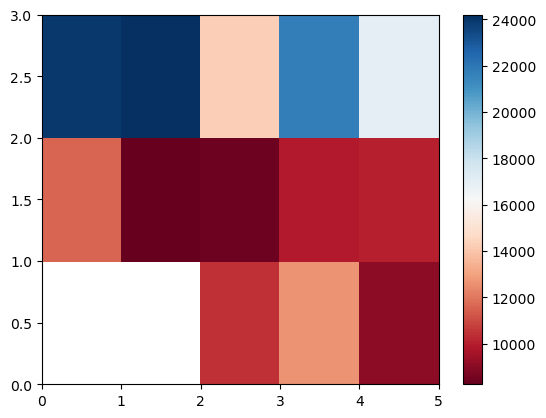

In [62]:
###MAPAS DE CALOR
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

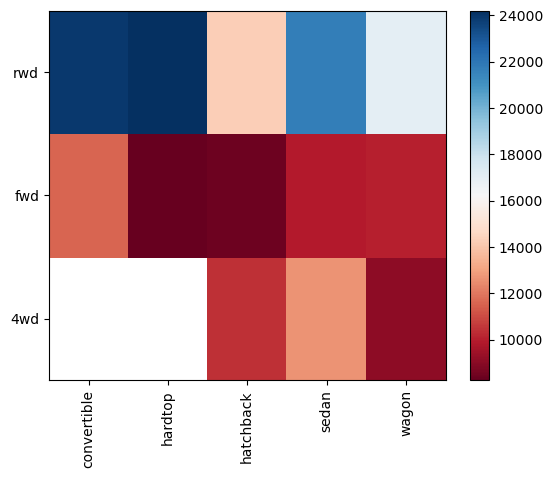

In [64]:
fig, ax= plt.subplots()
im= ax.pcolor(grouped_pivot, cmap='RdBu')

#Nombres de las etis
row_labels= grouped_pivot.columns.levels[1]
col_labels= grouped_pivot.index

#Mover etiquetas al centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5,minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5,minor=False)

##Insertar etis
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

##Rotar etis
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [67]:
##CORRELACION DE PEARSON
df.corr(numeric_only=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.273679,-0.035823,0.034606,-0.082201
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.244599,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.435936,0.324701,0.265201,0.070990
peak-rpm,0.273679,-0.360704,-0.287031,-0.219859,-0.320602,-0.266283,-0.244599,-0.435936,1.000000,-0.113723,-0.054257,-0.100854
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,-0.113723,1.000000,0.971337,-0.667449


In [69]:
##IMPORTAMOS UNA LIBRERIA STATS
from scipy import stats

In [71]:
##CALCULAMOS EL COEFICIENTE DE CORRELACION PEARSON Y EL VALOR P DE WHEELS-BASE Y PRICE
pearson_coef, p_value= stats.pearsonr(df['wheel-base'], df['price'])
print("el coeficiente de correlacion de pearson es ",pearson_coef, "con un P-value de P= ",p_value)

el coeficiente de correlacion de pearson es  0.5831681499789547 con un P-value de P=  4.527625545686471e-20


In [77]:
##LO MISMO QUE LO ANTERIOR PERO CON HORSEPOWER
df[["horsepower"]]= df[["horsepower"]].astype("float")
pearson_coef, p_value= stats.pearsonr(df['horsepower'], df['price'])
print("el coeficiente de correlacion de pearson es ",pearson_coef, "con un P-value de P= ",p_value)

el coeficiente de correlacion de pearson es  0.7579169537498174 con un P-value de P=  1.607670397813133e-39


In [73]:
##AHORA LO CALCULAMOS CON LENGTH
pearson_coef, p_value= stats.pearsonr(df['length'], df['price'])
print("el coeficiente de correlacion de pearson es ",pearson_coef, "con un P-value de P= ",p_value)

el coeficiente de correlacion de pearson es  0.6829862954386214 con un P-value de P=  1.6498873291219204e-29


In [75]:
##AHORA LO CALCULAMOS CON WIDTH
pearson_coef, p_value= stats.pearsonr(df['width'], df['price'])
print("el coeficiente de correlacion de pearson es ",pearson_coef, "con un P-value de P= ",p_value)

el coeficiente de correlacion de pearson es  0.7286988175931839 con un P-value de P=  3.214520483804455e-35


In [74]:
##AHORA LO CALCULAMOS CON ENGINE-SIZE
pearson_coef, p_value= stats.pearsonr(df['engine-size'], df['price'])
print("el coeficiente de correlacion de pearson es ",pearson_coef, "con un P-value de P= ",p_value)

el coeficiente de correlacion de pearson es  0.8617522436859718 con un P-value de P=  9.669661923636075e-62


In [76]:
##POR ULTIMO CON CITY-MPG
pearson_coef, p_value= stats.pearsonr(df['city-mpg'], df['price'])
print("el coeficiente de correlacion de pearson es ",pearson_coef, "con un P-value de P= ",p_value)

el coeficiente de correlacion de pearson es  -0.6674492651600006 con un P-value de P=  8.46370049772685e-28
